In [1]:
# Standard modules
import numpy as np
import os
import pandas as pd 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import logging
from numba import njit
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

# Move to root directory for easier module handling
os.chdir("../..")
print(os.listdir("."))


#LBAE imports
from modules.maldi_data import MaldiData
from modules.figures import Figures
from modules.atlas import Atlas
from modules.storage import Storage
from modules.scRNAseq import ScRNAseq


# multithreading/multiprocessing
from multiprocessing import Pool
import multiprocessing
from threadpoolctl import threadpool_limits

# set thread limit
threadpool_limits(16)


['.git', '.gitattributes', '.vscode', 'LICENSE.md', 'app.py', 'assets', 'config.py', 'data_sample', 'index.py', 'js', 'main.py', 'modules', 'notebooks', 'pages', 'readme', 'style', 'data', 'README.md', '.ipynb_checkpoints', 'Dockerfile', '.mypy_cache', '.gitignore', '.github', 'mkdocs.yml', 'docs', 'in_app_documentation', 'site', 'requirements.txt', 'remaining_TODOs.md', '__pycache__', 'nohup.out', 'scatter_lipids_metabolites.pdf', 'scatter_singlelipids_metabolites.pdf', 'test.png', 'scatter_lipids_allgenes.pdf', 'scatter_singlelipids_allgenes.pdf', 'output.png', 'R2_comparison.pdf']


In [2]:
path_data = "data/whole_dataset/"
path_annotations = "data/annotations/"
path_db = "data/app_data/data.db"

# Load shelve database
storage = Storage(path_db)

# Load data
data = MaldiData(path_data, path_annotations)

# Load Atlas and Figures objects. At first launch, many objects will be precomputed and shelved in
# the classes Atlas and Figures.
atlas = Atlas(data, storage, resolution=25, sample = False)
scRNAseq = ScRNAseq()
figures = Figures(data, storage, atlas, scRNAseq, sample=False)

In [4]:
table_meta = pd.read_csv('notebooks/scRNAseq/data/meta_table.tsv', sep='\t', usecols=[0, 2,3,4, 7], index_col = 0 )
table_exp_genes = pd.read_csv('notebooks/scRNAseq/data/expr_normalized_table.tsv', sep='\t')


In [5]:
# Replace 0 by nan
table_exp_genes.replace(0, np.nan, inplace=True)
table_exp_genes

,Gnai3,Cdc45,Scml2,Apoh,Narf,Cav2,Klf6,Scmh1,Cox5a,Tbx2,...,Pax8,Slc44a3,Cnpy1,Phox2b,Foxa2,Evx1,Lbx1,Sycp1,Hoxa5,Evx2
02A_15.8x13.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02A_18.75x13.07,NaN,NaN,NaN,NaN,NaN,1.684008,NaN,NaN,1.684008,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02A_16.74x13.07,NaN,NaN,NaN,NaN,NaN,NaN,1.763945,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02A_17.81x13.08,2.104541,NaN,NaN,NaN,NaN,2.104541,2.104541,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02A_19.96x14.09,NaN,NaN,NaN,NaN,NaN,1.426478,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40B_5.95x26.09,0.132020,0.000224,0.033652,0.000349,1.272426,1.402355,-0.111668,0.108158,1.624377,-0.000967,...,-0.003498,-0.012166,-0.286494,-0.129150,0.136763,-0.016156,-0.014281,-0.074251,-0.030010,-0.022963
40B_5.82x20.11,1.673355,0.000236,0.033409,0.000256,0.141985,1.818825,-0.114636,1.640739,-0.060180,-0.009116,...,-0.002487,-0.006893,1.253626,-0.105304,0.151959,-0.018096,-0.020910,-0.077746,-0.035407,-0.022194
40B_6.87x20.11,0.130242,0.000102,0.033220,0.000114,0.146362,0.286238,-0.106692,0.092296,1.561956,1.606201,...,-0.001946,-0.006411,-0.295467,-0.106853,0.147516,-0.020056,-0.024265,-0.086251,-0.033762,-0.024534
40B_7.9x22.06,1.393616,0.000200,0.033252,0.000364,1.414545,3.012467,-0.110347,0.096570,1.205837,1.917863,...,-0.001360,-0.006197,-0.296714,-0.106891,0.147179,-0.017907,-0.021636,-0.084575,-0.031733,-0.024155


In [6]:
# Reorganize columns
table_meta = table_meta[['stereo_AP', 'stereo_DV', 'stereo_ML', 'ABA_acronym']]

In [7]:
# Keep only the spots that are present in both tables
table_meta = table_meta.loc[table_meta.index.isin(table_exp_genes.index)]
table_exp_genes = table_exp_genes.loc[table_exp_genes.index.isin(table_exp_genes.index)]

In [8]:
# Ensure that the table are sorted by increasing spots
table_meta.sort_index(inplace = True)
table_exp_genes.sort_index(inplace = True)

# Get spots and genes names
l_spots = list(table_meta.index)
l_genes = list(table_exp_genes.columns)

In [9]:
counts = table_meta['ABA_acronym'].value_counts()

In [10]:
# Do a linear regression structure-wise to get coordinates of the molecular atlas in the ccfv3
l_x = []
l_y = []
l_z = []
l_xs = []
l_ys = []
l_zs = []
for acronym in counts[counts == 1].index.to_list():
    try:
        id_structure = atlas.bg_atlas.structures[acronym]['id']
        array_coor = np.where(atlas.bg_atlas.annotation == id_structure)
        xs, ys, zs = np.mean(array_coor, axis=1)*25/1000
        std_xs, std_ys, std_zs = np.std(array_coor, axis=1)*25/1000
        x, y, z = table_meta[table_meta['ABA_acronym'] == acronym].iloc[0,0:3].to_numpy()
        if std_xs<0.12:
            l_x.append(x)
            l_xs.append(xs)
        if std_ys<0.12:
            l_y.append(y)
            l_ys.append(ys)
        if std_zs<0.12:
            l_z.append(z)
            l_zs.append(zs)
    except:
        pass
  
X = np.vstack([np.array(l_x), np.ones(len(l_x)), np.zeros(len(l_x)), np.zeros(len(l_x))   ]).T
Y = np.vstack([np.array(l_y), np.zeros(len(l_y)), np.ones(len(l_y)), np.zeros(len(l_y))    ]).T
Z = np.vstack([np.array(l_z), np.zeros(len(l_z)), np.zeros(len(l_z)) , np.ones(len(l_z))      ]).T
M = np.vstack((X,Y,Z))
y = np.array(l_xs + l_ys + l_zs)

a, b, c, d = np.linalg.lstsq(M, y, rcond=None)[0]


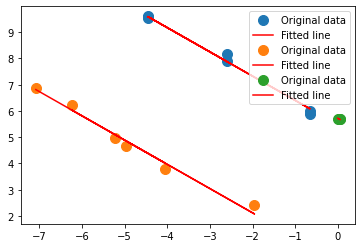

In [11]:
plt.plot(np.array(l_x), np.array(l_xs), 'o', label='Original data', markersize=10)
plt.plot(np.array(l_x), a*np.array(l_x) + b, 'r', label='Fitted line')
plt.plot(np.array(l_y), np.array(l_ys), 'o', label='Original data', markersize=10)
plt.plot(np.array(l_y), a*np.array(l_y) + c, 'r', label='Fitted line')
plt.plot(np.array(l_z), np.array(l_zs), 'o', label='Original data', markersize=10)
plt.plot(np.array(l_z), a*np.array(l_z) + d, 'r', label='Fitted line')
plt.legend()
plt.show()

In [12]:
# Convert molecular atlas coordinates to our system of coordinates (i.e. ccfv3)
table_meta["stereo_AP"] = a * table_meta["stereo_AP"] + b
table_meta["stereo_DV"] = a * table_meta["stereo_DV"] + c
table_meta["stereo_ML"] = a * table_meta["stereo_ML"] + d
table_meta

,stereo_AP,stereo_DV,stereo_ML,ABA_acronym
01A_13.26x27.17,2.762148,1.863234,4.556012,MOs1
01A_13.28x28.21,2.762148,1.834386,4.752180,MOs1
01A_14.27x31.3,2.762148,1.962551,5.365314,MOs1
01A_14.28x27.2,2.762148,2.134407,4.584860,MOs2/3
01A_14.28x29.25,2.762148,2.043302,4.972934,MOs2/3
...,...,...,...,...
40B_6.95x24.09,10.516534,2.586838,4.963925,ICd
40B_6.95x25.1,10.516534,2.407980,5.333181,ICd
40B_6.96x23.09,10.516534,2.650304,4.560051,ICe
40B_7.9x22.06,10.516534,2.918592,4.137425,ICe


# regression


In [2]:
table_exp_genes = pd.read_hdf('/data/LBA_DATA/celltype/rna_meletis.h5ad', key='table')
table_meta = pd.read_hdf('/data/LBA_DATA/celltype/spots_meletis.h5ad', key='table')

In [3]:
df = pd.read_hdf("/data/luca/lipidatlas/MAIA-NEW/dd2-test-newcolor.h5ad", key="table")

In [4]:
import tqdm

In [9]:
df.head()

,x_ccf,y_ccf,z_ccf,LPC O-16:2 478.329,LPC 16:0 496.34,LPC O- 18:3,LPC O-18:2 506.36,LPC O-16:2 516.285,LPC 15:1,LPC 18:1 522.355,...,level_8,level_9,level_10,level_11,level_12,level_13,level_14,R,G,B
section1_pixel17_100,4.409796,1.227594,7.131945,-6.581444,-7.044853,-7.562702,-7.692502,-7.940333,-7.904482,-8.158474,...,206.0,411.0,821.0,1642.0,3256.0,6374.0,12253.0,0.898039,0.849506,0.839106
section1_pixel17_105,4.412813,1.206127,6.998784,-8.059301,-8.040170,-8.862305,-8.793903,-8.672385,-9.210010,-9.210322,...,210.0,419.0,837.0,1674.0,3320.0,6502.0,12509.0,0.129412,0.825882,0.425882
section1_pixel17_106,4.413417,1.201827,6.972198,-8.665620,-8.784379,-9.070487,-8.640329,-8.485686,-9.210010,-8.392720,...,228.0,455.0,910.0,1820.0,3612.0,7085.0,13674.0,0.000000,0.135112,0.304751
section1_pixel17_107,4.414021,1.197525,6.945627,-7.689097,-8.557046,-8.649344,-8.318802,-8.229695,-9.210010,-8.355823,...,194.0,387.0,773.0,1546.0,3064.0,5990.0,11485.0,0.756863,0.951373,0.551373
section1_pixel17_108,4.414626,1.193223,6.919072,-7.790827,-8.357624,-8.691768,-8.309686,-8.046171,-9.210010,-8.419049,...,206.0,411.0,821.0,1642.0,3256.0,6373.0,12251.0,0.898039,0.849506,0.839106


In [51]:
coords_lipids = df.iloc[:,:3]

In [52]:
coords_lipids = coords_lipids.loc[df.index.str.contains('section13')]

In [53]:
# random subsample
ix_random = np.random.choice(np.arange(len(coords_lipids)), 1000, replace=False)
coords_lipids = coords_lipids.iloc[ix_random]

In [55]:

def euclidean_distance(vec1, vec2):
    """
    Compute the Euclidean distance between two vectors.
    """
    return np.linalg.norm(vec1 - vec2)

def find_most_similar_vector(given_vector, table_of_vectors):
    """
    Find the index of the most similar vector in the table of vectors to the given vector.
    """
    min_distance = float('inf')  # Initialize minimum distance
    most_similar_index = -1  # Initialize index of most similar vector

    for i, vector in enumerate(table_of_vectors):
        distance = euclidean_distance(given_vector, vector)
        if distance < min_distance:
            min_distance = distance
            most_similar_index = i

    return most_similar_index, min_distance

In [56]:
# match the coordinates of the lipid atlas to the nearest one in metafile
print(coords_lipids.shape)
matched_row_ids = []
min_distances = []
for i, coord in tqdm.tqdm(enumerate(coords_lipids.values)):
    
    # select the closest row in table_meta
    ix, min_distance = find_most_similar_vector(coord, table_meta.iloc[:,:3].values)
    
    
    matched_row_ids.append(ix)
    min_distances.append(min_distance)
    
#     if i == 2:
#         break

(1000, 3)


1000it [02:36,  6.38it/s]


In [70]:
ix_distance = np.array(min_distances) < 0.1

In [161]:
# gene expression predictors
X = table_exp_genes.iloc[matched_row_ids].iloc[ix_distance]
y = df[df.index.str.contains('section13')].iloc[ix_random].iloc[ix_distance]

In [162]:
X = np.nan_to_num(X)

In [163]:
y = y.iloc[:,y.columns.str.startswith('exp')].values

In [180]:
# rescale
from sklearn.preprocessing import MinMaxScaler
y = MinMaxScaler().fit_transform(y)

#### elastic net

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

regr = ElasticNet(fit_intercept=True, alpha=0., positive=False)
regr = LinearRegression(fit_intercept=False)

In [204]:
regr.fit(X, y[:,10])

LinearRegression(fit_intercept=False)

In [205]:
regr.coef_.mean()

359552.29457037325

In [120]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0, alpha=0.5,l1_ratio=0.01)


coefficients = []

for i in tqdm.tqdm(range(y.shape[1])):
    regr.fit(X, y[:,i])
    coefficients.append(regr.coef_)

# >>> print(regr.coef_)

In [121]:
coefficients = np.array(coefficients)

In [122]:
np.abs(coefficients).sum(axis=1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### random forest

In [207]:
coefficients = []
for i in tqdm.tqdm(range(y.shape[1])):
    regr = RandomForestRegressor(max_depth=2, random_state=0)
    regr.fit(X, y[:,i])
    coefficients.append(regr.feature_importances_)
#     break

100%|███████████████████████████████████████████████████████████████████████████| 202/202 [31:51<00:00,  9.46s/it]


In [208]:
coefficients = np.array(coefficients)

In [209]:
ix_best_genes = np.argmax(np.abs(coefficients), axis=1)

In [210]:
y = df[df.index.str.contains('section13')].iloc[ix_random].iloc[ix_distance]
y = y.iloc[:,y.columns.str.startswith('exp')]

In [211]:
coefficients.shape

(202, 15326)

In [216]:
ix_best_genes = np.unique(ix_best_genes)

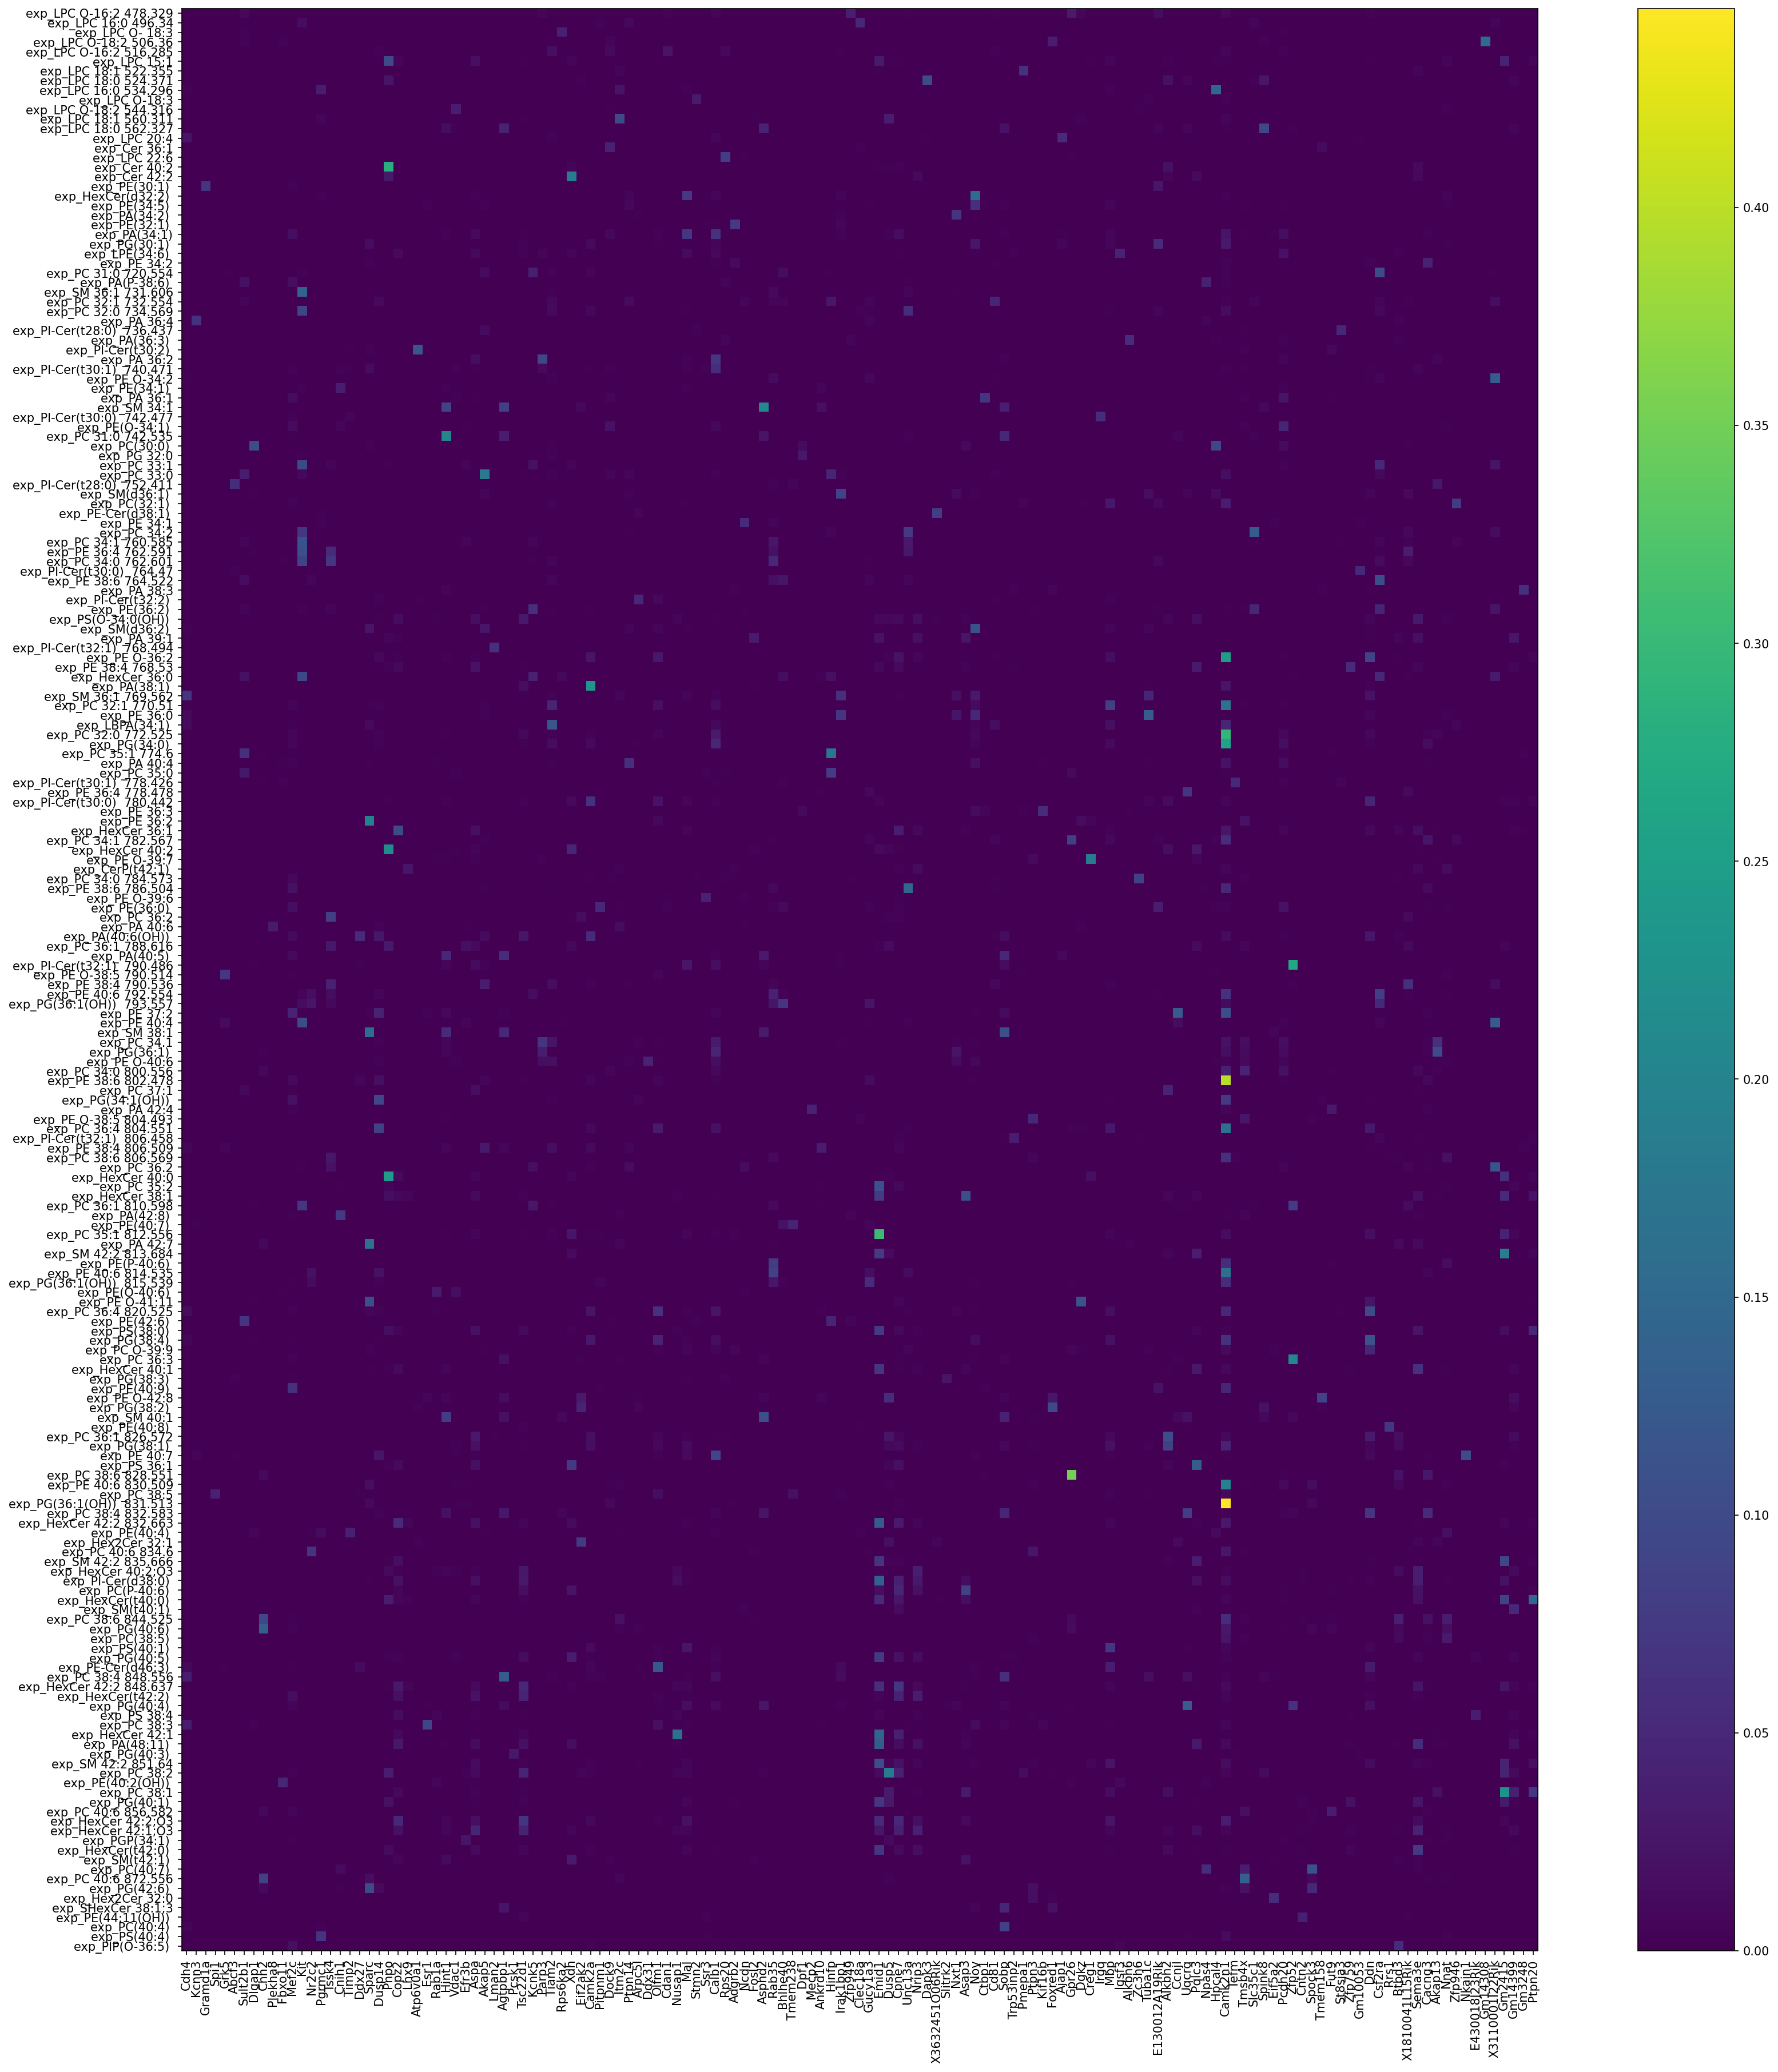

In [217]:
fig = plt.figure(None,(30,30), dpi=150)

plt.imshow(coefficients[:, ix_best_genes])
plt.xticks(np.arange(len(table_exp_genes.columns.values[ix_best_genes])), 
           table_exp_genes.columns.values[ix_best_genes],
          rotation=90)

plt.yticks(np.arange(len(y.columns.values[:len(coefficients)])), 
           y.columns.values[:len(coefficients)],)

plt.colorbar()
plt.show()



In [ ]:
# pick top 10 genes that are most predictive for each lipid